# Binary class dataset: The UCI Breast Cancer Wisconsin (Diagnostic) dataset

##  Preparing the datasets


### Load the Data

In [39]:
import pandas as pd

columns = [
    "ID", "Diagnosis",
    "Radius_Mean", "Texture_Mean", "Perimeter_Mean", "Area_Mean", "Smoothness_Mean",
    "Compactness_Mean", "Concavity_Mean", "Concave_Points_Mean", "Symmetry_Mean", "Fractal_Dimension_Mean",
    "Radius_SE", "Texture_SE", "Perimeter_SE", "Area_SE", "Smoothness_SE",
    "Compactness_SE", "Concavity_SE", "Concave_Points_SE", "Symmetry_SE", "Fractal_Dimension_SE",
    "Radius_Worst", "Texture_Worst", "Perimeter_Worst", "Area_Worst", "Smoothness_Worst",
    "Compactness_Worst", "Concavity_Worst", "Concave_Points_Worst", "Symmetry_Worst", "Fractal_Dimension_Worst"
]

file_path = "data/wdbc.data" 
data = pd.read_csv(file_path, header=None, names=columns)

# Preview 
print(data.head())


         ID Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius_Worst  Texture_Worst  Perimeter_Worst  Area_Wor

### Preprocess the Data
Remove the ID column (not useful for classification).

Encode the Diagnosis column:
- M (malignant) → 1
- B (benign) → 0

Separate features and labels.

In [40]:
# Remove ID column
data = data.drop(columns=["ID"])

# Encode Diagnosis column
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

# Separate features and labels
features = data.drop(columns=["Diagnosis"]).values
labels = data["Diagnosis"].values


### Shuffle and Split the Dataset

In [41]:
from sklearn.model_selection import train_test_split

# Splits and stratification
proportions = [40, 60, 80, 90]
splits = {}
for prop in proportions:
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=prop/100, stratify=labels, random_state=42
    )
    splits[f"{int(prop)}_{int(100-prop)}"] = (X_train, X_test, y_train, y_test)


### Visualize Class Distributions

In [42]:
#block nay output ra hinh rieng le, chi chay khi viet report
'''
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(title, data_labels):
    unique, counts = np.unique(data_labels, return_counts=True)
    plt.bar(["Benign", "Malignant"], counts, color=["skyblue", "salmon"])
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.show()

# Original dataset
plot_distribution("Original Dataset", labels)

# Each split
for key, (X_train, X_test, y_train, y_test) in splits.items():
    plot_distribution(f"Training Set {key}", y_train)
    plot_distribution(f"Test Set {key}", y_test)
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef plot_distribution(title, data_labels):\n    unique, counts = np.unique(data_labels, return_counts=True)\n    plt.bar(["Benign", "Malignant"], counts, color=["skyblue", "salmon"])\n    plt.title(title)\n    plt.xlabel("Classes")\n    plt.ylabel("Counts")\n    plt.show()\n\n# Original dataset\nplot_distribution("Original Dataset", labels)\n\n# Each split\nfor key, (X_train, X_test, y_train, y_test) in splits.items():\n    plot_distribution(f"Training Set {key}", y_train)\n    plot_distribution(f"Test Set {key}", y_test)\n'

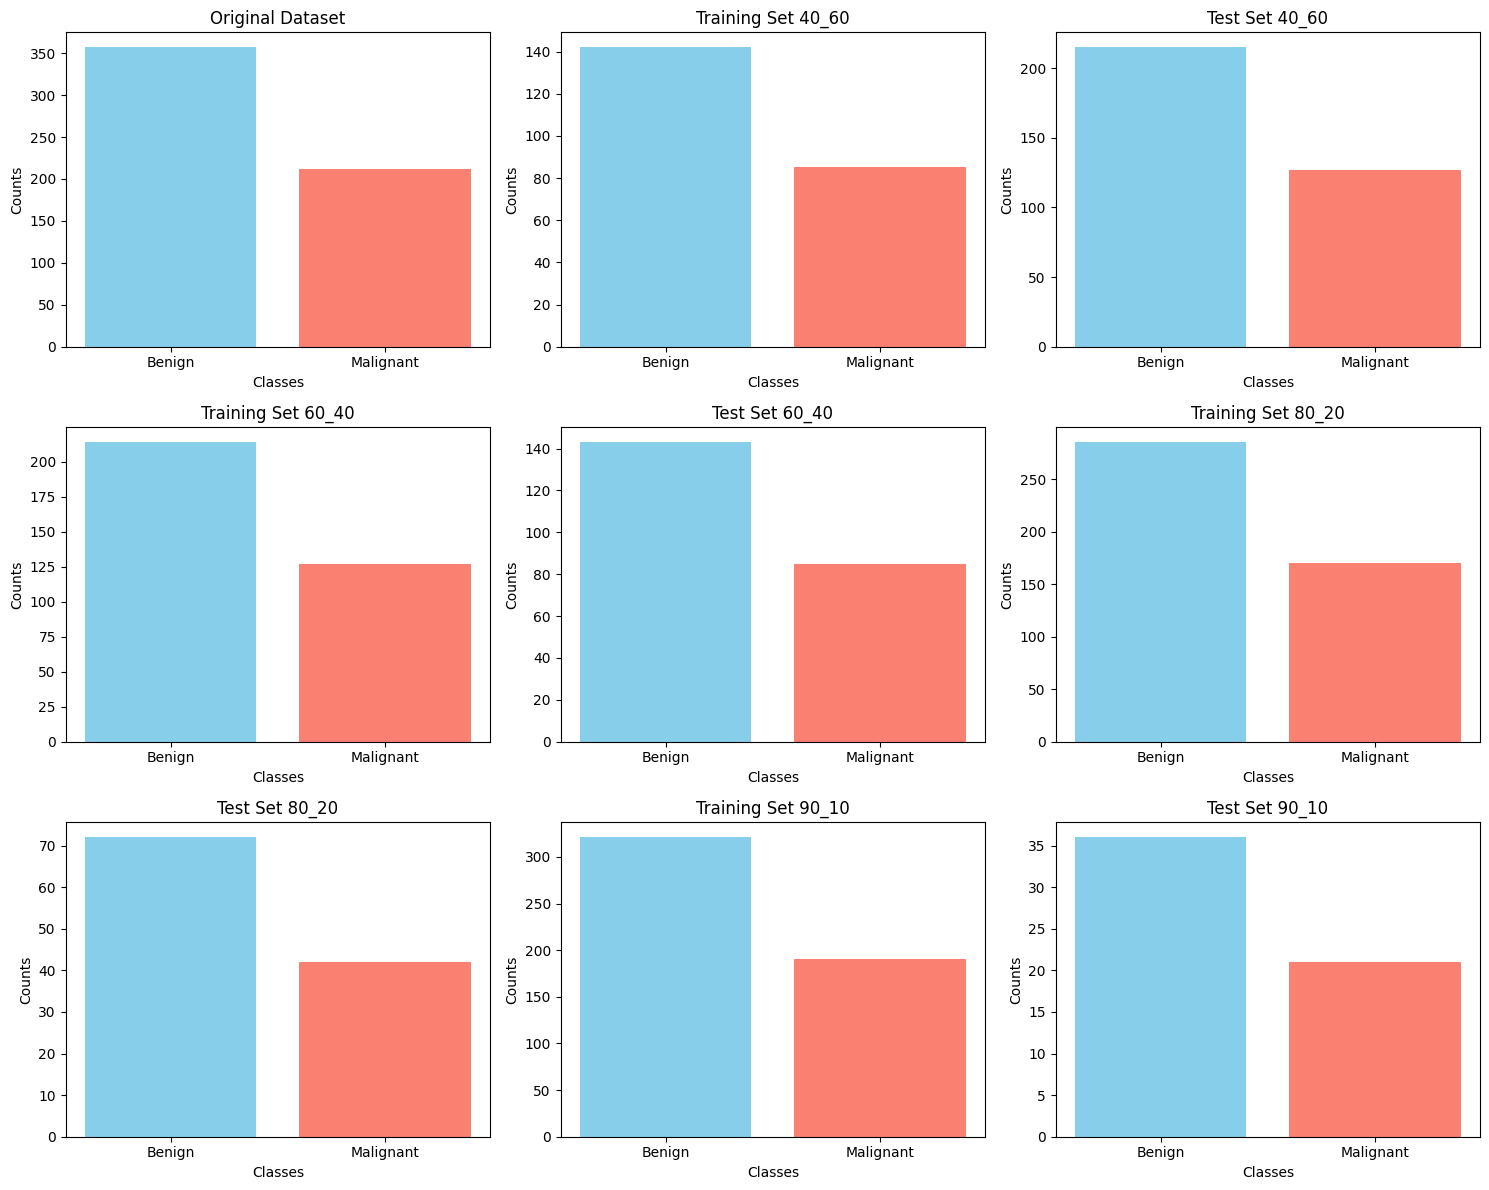

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(ax, title, data_labels):
    unique, counts = np.unique(data_labels, return_counts=True)
    ax.bar(["Benign", "Malignant"], counts, color=["skyblue", "salmon"])
    ax.set_title(title)
    ax.set_xlabel("Classes")
    ax.set_ylabel("Counts")

# Number of splits
num_splits = len(splits)
total_plots = 1 + num_splits * 2  # Original + training + test sets
rows = (total_plots + 2) // 3  # Organize into 3 columns
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# Plot the original dataset
plot_distribution(axes[0], "Original Dataset", labels)

# Plot each split
plot_idx = 1
for key, (X_train, X_test, y_train, y_test) in splits.items():
    plot_distribution(axes[plot_idx], f"Training Set {key}", y_train)
    plot_idx += 1
    plot_distribution(axes[plot_idx], f"Test Set {key}", y_test)
    plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


## Building the decision tree classifiers

In [47]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train and visualize decision trees 
for key, (X_train, X_test, y_train, y_test) in splits.items():
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Export the tree 
    dot_data = export_graphviz(
        clf, 
        out_file=None,  
        feature_names=data.drop(columns=["Diagnosis"]).columns, 
        class_names=["Benign", "Malignant"],  
        filled=True,  
        rounded=True,  
        special_characters=True
    )
    

    graph = graphviz.Source(dot_data)
    graph.render(f"plots/dataset1/decision_tree_{key}", format="png")  


## Evaluating the decision tree classifiers

Classification Report for Split 40_60:
              precision    recall  f1-score   support

      Benign       0.91      0.96      0.93       215
   Malignant       0.92      0.83      0.88       127

    accuracy                           0.91       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.91      0.91       342



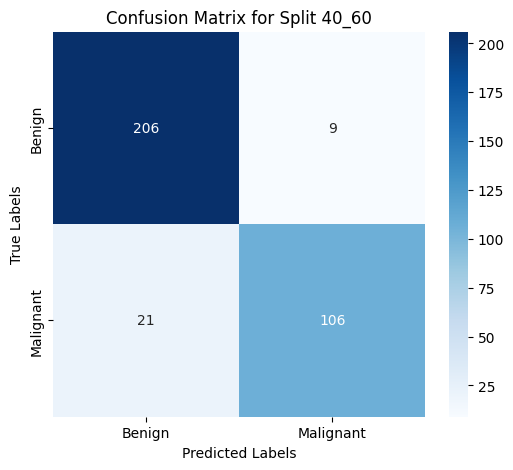

Classification Report for Split 60_40:
              precision    recall  f1-score   support

      Benign       0.94      0.96      0.95       143
   Malignant       0.93      0.91      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



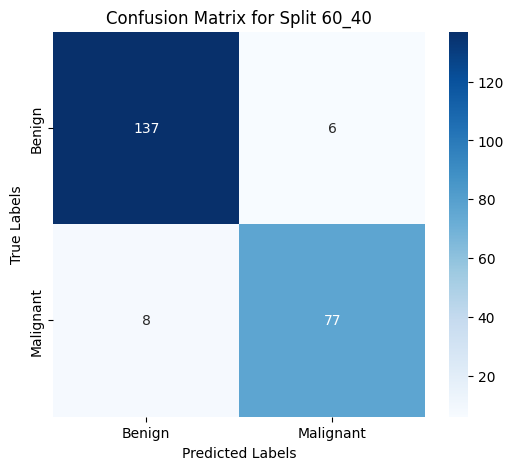

Classification Report for Split 80_20:
              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



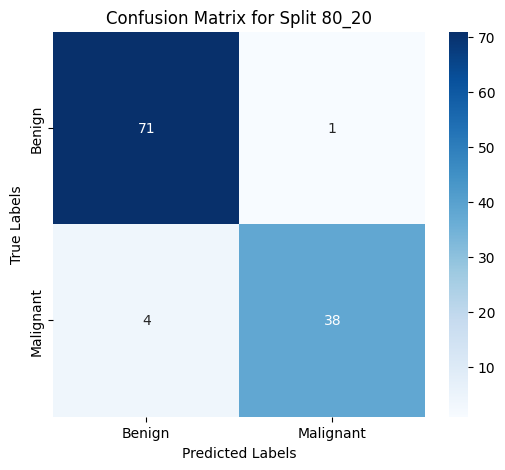

Classification Report for Split 90_10:
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        36
   Malignant       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



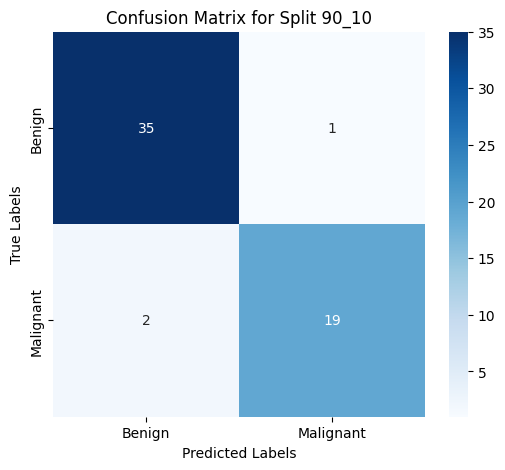

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate decision trees for all splits
for key, (X_train, X_test, y_train, y_test) in splits.items():
    # Train the decision tree classifier using information gain (entropy)
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Generate and print classification report
    print(f"Classification Report for Split {key}:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))
    
    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix for Split {key}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


## The depth and accuracy of a decision tree

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Train and evaluate decision trees for max_depth values: None, 2, 3, 4, 5, 6, 7
max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []

# Prepare data (use 80/20 split)
X_train, X_test, y_train, y_test = splits["80_20"]

for max_depth in max_depth_values:
    # Train the decision tree classifier with the specified max_depth
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Export the tree to Graphviz format
    dot_data = export_graphviz(
        clf, 
        out_file=None,  # Output to string (DOT format)
        feature_names=data.drop(columns=["Diagnosis"]).columns,  # Feature names
        class_names=["Benign", "Malignant"],  # Target classes
        filled=True,  # Colorize nodes
        rounded=True,  # Rounded corners
        special_characters=True
    )


    graph = graphviz.Source(dot_data)
    graph.render(f"plots/dataset1/decision_tree_max_depth_{max_depth}", format="png") 
    

# Report the accuracy scores in a table
print(f"{'Max Depth':<10}{'Accuracy'}")
for depth, accuracy in zip(max_depth_values, accuracy_scores):
    if accuracy is not None:
        print(f"{depth:<10}{accuracy:.4f}")
    else:
        print(f"{depth:<10} N/A")
        
# Plot the accuracy vs max_depth
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracy_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title("Accuracy vs Max Depth of Decision Tree", fontsize=16)
plt.xlabel("Max Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


Max Depth Accuracy


TypeError: unsupported format string passed to NoneType.__format__